# Statistics
##### Facts are stubborn, but statistics are more pliable - Mark Twain

In [5]:
%%capture
# To supress the output when calling LinearAlgebra file
%run ./LinearAlgebra.ipynb
import random as random
import matplotlib.pyplot as plt
import math
from collections import Counter

### Describing a Single Set of data

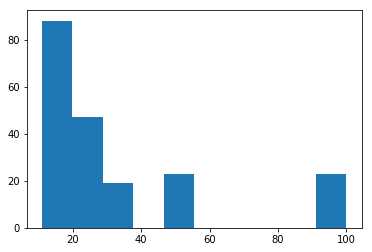

200 100 11


In [6]:
# Exponential distribution with max value 100
num_friends = [100//(random.choice(range(9))+1) for _ in range(200)]

# Plot histogram
plt.hist(num_friends)
plt.show()

num_points      = len(num_friends)
largest_value   = max(num_friends)
smallest_value  = min(num_friends)
print(num_points, largest_value, smallest_value)

sorted_values   = sorted(num_friends)
smallest_value  = sorted_values[0]
second_largest_value = sorted_values[-2]

### Central tendencies

In [7]:
def mean(x):
    return sum(x)/len(x)

def median(x):
    n            = len(x)
    sorted_x     = sorted(x)
    middle_point = n//2
    if n%2 != 0: #  
        return sorted_x[middle_point]
    else:
        point1       = middle_point-1
        point2       = middle_point
        return(mean([sorted_x[point1], sorted_x[point2]]))

def quantile(x, p):
    """returns pth percentile value in x"""
    p_index = int(len(x)*p)
    return sorted(x)[p_index]

def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

### Dispersion

In [8]:
def data_range(x):
    return max(x) - min(x)

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations)/(n-1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def interquartile_range(x):
    return quantile(x,0.75) - quantile(x,0.25)

def fns(x):
    """five number summary"""
    return min(x), quantile(x,0.25), quantile(x,0.5), quantile(x,0.75), max(x)

### Correlation

In [9]:
def covariance(x,y):
    n = len(x)
    return dot(de_mean(x),de_mean(y))/(n-1)

def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y)/(stdev_x*stdev_y)
    else:
        return 0

### Remove outliers

In [11]:
non_outlier_indices    = [i for i, x_i in enumerate(num_friends) if x_i!=100] # index of non outlier value = 100
num_friends_good       = [x_i for i, x_i in enumerate(num_friends) if i in non_outlier_indices]
print("Number of outliers removed:", len(num_friends)-len(num_friends_good))

Number of outliers removed: 23
